# Analysing precipitation timeseries with PANDAS

Analisando série temporal de precipitação com PANDAS

In [1]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#%quickref

## Read data into dataframe

In [2]:
#df2=pd.read_csv('rain.txt.gz',delim_whitespace=True,parse_dates=True,index_col=[1,0],na_values=["-32767.0000000"])
#df2.sort_index(level=[0,1],inplace=True)
#df2.tz_localize('utc',level=1)[:4]
df2=pd.read_pickle('pluvs.pkl.gz')

In [3]:
df=pd.read_csv('out_xpol.txt.gz',delim_whitespace=True,parse_dates=True,index_col=[1,0],na_values=["-32767.0000000"])
az=0.15
bz=0.39
akdp=40.6 #Ryzhkov and Zrnic (1996)
bkdp=0.866 #Ryzhkov and Zrnic (1996)
df=df.assign(rz=(az/30)*((10**(df['Z_dbZ']/10))**bz))
df=df.assign(rkdp=(akdp/30)*(abs(df['Kdp_o_km'])**bkdp)*np.sign(df['Kdp_o_km']))

Filter rz for valid radar data (filtered by polatimetric variables)

In [4]:
df['rz'].where((df.Z_dbZ>=0) & (df.Z_dbZ<=50) & (df.Zdr_dbZr>=0) & (df.Zdr_dbZr<=3.5) & (df.Kdp_o_km>=0) & (df.Kdp_o_km<=5) 
               & (df.Rhv>0.85),inplace=True)
df['rkdp'].where((df.Z_dbZ>=0) & (df.Z_dbZ<=50) & (df.Zdr_dbZr>=0) & (df.Zdr_dbZr<=3.5) & (df.Kdp_o_km>=0) & (df.Kdp_o_km<=5) 
               & (df.Rhv>0.85),inplace=True)

df.sort_index(level=[0,1],inplace=True)
df.tz_localize('utc',level=1)

In [5]:
df=(df.merge(right=df2,left_index=True,right_index=True,how='outer',indicator='rain_merge'))
#df3=df.reset_index().merge(right=df2.reset_index(),how='inner',on=['estacao_codigo','datetime'],indicator=True)
#df3.set_index(['estacao_codigo','datetime'],inplace=True)
#pd.crosstab(df.rz>=-1,df.Rg_mm_10min>=-1)
del df2
df3=pd.read_csv('out_spol.txt.gz',delim_whitespace=True,parse_dates=True,index_col=[1,0],na_values=["-32767.0000000"])
df=(df.merge(right=df3,left_index=True,right_index=True,how='outer',indicator='SPOL_merge'))
del df3
#df3[df3._merge=='both'].loc[5,:].plot()
#df3[df3._merge=='right_only'].loc[5,:]

In [6]:
df.to_pickle("dataframe.pickle.gz",compression="gzip")


#df3.sort_index(level=[0,1],inplace=True)
#df3.tz_localize('utc',level=1)[:4]

## Do some tests and timeseries plots for all stations

Selecting station 6 dataframe timeseries

In [7]:
df.loc[6,:][:5]

,r_km,Theta,height_km,lat,lon,Z_dbZ,Zdr_dbZr,Kdp_o_km,Vr_m_s,Rhv,rz,rkdp,dado,Rg_mm_10,rain_merge,Rspol,SPOL_merge
datetime,,,,,,,,,,,,,,,,,
2015-01-12 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
2015-01-12 17:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
2015-01-12 17:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
2015-01-12 17:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
2015-01-12 17:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only


### Reflectivity at station 6 timeseries

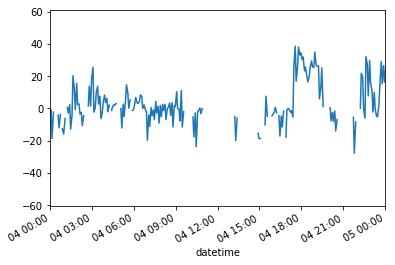

In [11]:
p=df[df.rain_merge!='right_only'].loc[6,:]['Z_dbZ'].plot()
p.set_xlim(pd.Timestamp('2016-06-04'),pd.Timestamp('2016-06-05'))
p.xaxis.set_major_formatter(mdates.DateFormatter("%d %H:%M"))

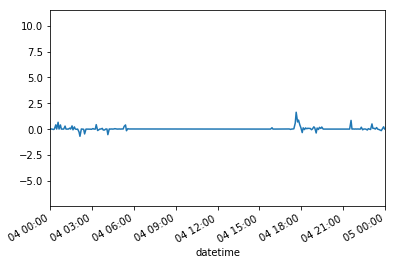

In [13]:
p=df[df.rain_merge!='right_only'].loc[6,:]['Kdp_o_km'].plot()
p.set_xlim(pd.Timestamp('2016-06-04'),pd.Timestamp('2016-06-05'))
p.xaxis.set_major_formatter(mdates.DateFormatter("%d %H:%M"))

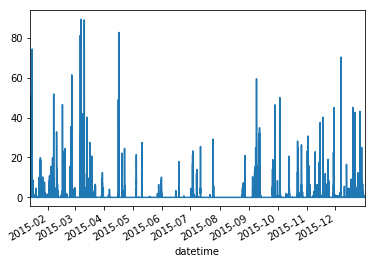

In [14]:
p=df[df.SPOL_merge!='left_only'].loc[6,:]['Rspol'].plot()
#p.set_xlim(pd.Timestamp('2016-06-04'),pd.Timestamp('2016-06-05'))
#p.xaxis.set_major_formatter(mdates.DateFormatter("%d %H:%M"))

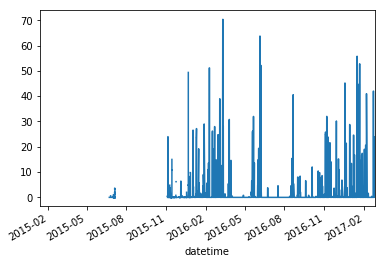

In [15]:
p=df[df.rain_merge!='left_only'].loc[6,:].dado.plot()
#p.set_xlim(pd.Timestamp('2016-06-04'),pd.Timestamp('2016-06-05'))
#p.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y %H:%M"))

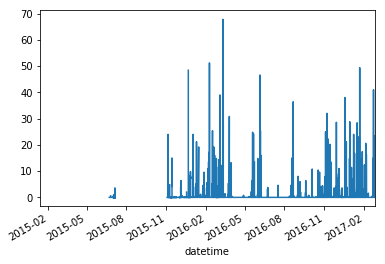

In [18]:
p=df[df.rain_merge!='left_only'].loc[6,:].Rg_mm_10.plot()
#p.set_xlim(pd.Timestamp('2016-06-04'),pd.Timestamp('2016-06-05'))
#p.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y %H:%M"))

In [21]:
df.query('Rg_mm_10 < 0')

,,r_km,Theta,height_km,lat,lon,Z_dbZ,Zdr_dbZr,Kdp_o_km,Vr_m_s,Rhv,rz,rkdp,dado,Rg_mm_10,rain_merge,Rspol,SPOL_merge
estacao_codigo,datetime,,,,,,,,,,,,,,,,,


### Scatterplot at station 6 of Reflectivity (instantaneous) vs gauge rainfall

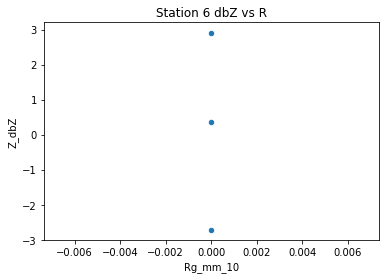

In [20]:
p=df.loc[6,:].plot.scatter(x='Rg_mm_10',y='Z_dbZ',title='Station 6 dbZ vs R')
#p.set_xscale('log')

### Scatter for all stations of Reflectivity vs gauge rainfall

KeyboardInterrupt: 

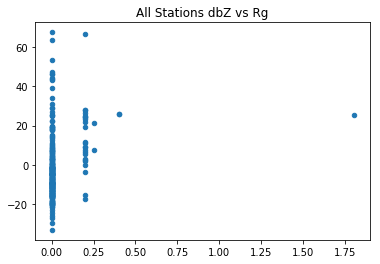

In [22]:
p=df.plot.scatter(x='Rg_mm_10',y='Z_dbZ',title='All Stations dbZ vs Rg')
#p.set_xscale('log')

## Grouping data by station (using station code: 2nd columm of dataframe table)

In [23]:
# Group data by stations
station_grouped=df.reset_index(level=0).groupby('estacao_codigo')

### Let´s analyse some statistics about each variable (r_gauges, r_radar)

In [24]:
#pd.set_option('max_rows',None)
station_grouped.Z_dbZ.describe()

,count,mean,std,min,25%,50%,75%,max
estacao_codigo,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29470.0,-3.096553,10.830730,-44.910000,-8.880000,-5.070,-1.200000,52.340000
5,74803.0,-5.572389,9.646845,-63.900002,-11.340000,-5.890,-0.940000,53.130001
6,69911.0,-6.261857,9.388585,-55.099998,-11.490000,-6.600,-2.320000,55.340000
9,31771.0,-5.003118,11.003119,-52.740002,-10.820000,-6.970,-3.280000,53.240002
10,30489.0,-3.780050,10.647918,-51.900002,-9.410000,-5.540,-1.890000,52.900002
11,63762.0,-7.581204,10.532330,-61.860001,-13.570000,-9.180,-4.072500,56.340000
137,99609.0,6.779876,10.826100,-55.279999,-1.960000,3.300,17.090000,54.869999
143,81006.0,-7.869833,9.863044,-63.340000,-13.510000,-8.120,-3.660000,67.480003


In [25]:
station_grouped.Zdr_dbZr.describe()

,count,mean,std,min,25%,50%,75%,max
estacao_codigo,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18505.0,-2.113735,6.061331,-41.759998,-4.950000,-1.020000,0.4700,38.520001
5,72253.0,-7.937648,7.592123,-55.099998,-13.170000,-7.890000,-2.0400,35.790001
6,61860.0,-3.305409,6.624781,-49.479999,-7.340000,-2.910000,0.4500,49.529999
9,20588.0,-2.145239,6.092176,-41.270001,-5.130000,-1.100000,0.4700,38.270001
10,19520.0,-2.293329,6.120150,-42.360001,-5.310000,-1.180000,0.4225,38.410000
11,54522.0,-2.365429,6.816076,-50.990002,-6.020000,-1.330000,1.3700,46.830002
137,98966.0,4.326468,5.112470,-45.540001,1.090000,4.270000,7.2600,50.220001
143,78897.0,-6.786365,8.087703,-57.340000,-12.600000,-6.110000,-0.4000,43.770001


In [ ]:
station_grouped.Kdp_o_km.describe()

In [ ]:
station_grouped.Rhv.describe()

In [ ]:
station_grouped.Vr_m_s.describe()

In [ ]:
station_grouped.Rg_mm_10.describe()

In [ ]:
station_grouped.rz.describe()

## Let's resample the data only for R(Z-R) Rgauges and Raw gauges

In [26]:
station_2min=station_grouped.resample('2T',label='left').agg({'r_km': min, 'dado': sum,'Rg_mm_10': sum, 'rz': sum, 'Rspol': sum, 'rkdp': sum})

station_10min=station_grouped.resample('10T',label='left').agg({'r_km': min, 'dado': sum,'Rg_mm_10': sum, 'rz': sum, 'Rspol': sum, 'rkdp': sum})

station_1h=station_grouped.resample('1H',label='left').agg({'r_km': min, 'dado': sum,'Rg_mm_10': sum, 'rz': sum, 'Rspol': sum, 'rkdp': sum})

station_1d=station_grouped.resample('1D',label='left').agg({'r_km': min, 'dado': sum,'Rg_mm_10': sum, 'rz': sum, 'Rspol': sum, 'rkdp': sum})


In [27]:
station_1d.to_pickle('st1d.pkl.gz')

In [28]:
station_1h.to_pickle('st1h.pkl.gz')

In [29]:
station_10min.to_pickle('st10m.pkl.gz')

In [31]:
station_2min.to_pickle('st2m.pkl.gz')

SystemError: error return without exception set

In [ ]:
station_2min.plot.scatter(x='Rg_mm_10',y='rz',title='2min Z-R')

In [ ]:
station_2min.plot.scatter(x='Rg_mm_10',y='rkdp',title='2min Z-KDP')

In [ ]:
station_10min.plot.scatter(x='Rg_mm_10',y='rz',title='10min Z-R')

In [ ]:
station_10min.plot.scatter(x='Rg_mm_10',y='rkdp',title='10min Z-KDP')

In [ ]:
station_1h.plot.scatter(x='Rg_mm_10',y='rz',title='1h Z-R')

In [ ]:
station_1h.plot.scatter(x='Rg_mm_10',y='rkdp',title='1h Z-KDP')

In [ ]:
station_1d.plot.scatter(x='Rg_mm_10',y='rz',title='1d Z-R')

In [ ]:
station_1d.plot.scatter(x='Rg_mm_10',y='rkdp',title='1d Z-KDP')

KeyboardInterrupt: 

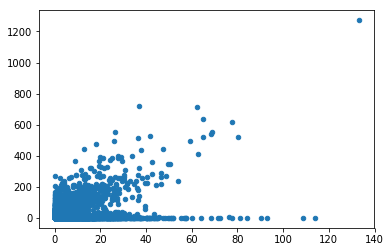

In [34]:
station_1h.plot.scatter(x='Rg_mm_10',y='Rspol')

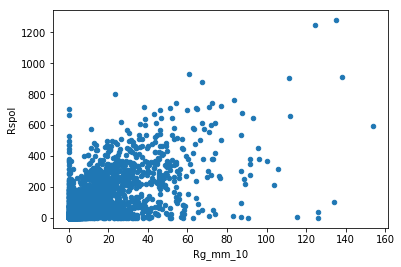

In [33]:
station_1d.plot.scatter(x='Rg_mm_10',y='Rspol')

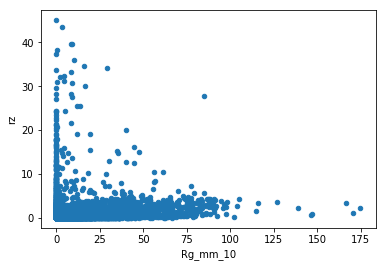

In [35]:
station_1d.plot.scatter(x='Rg_mm_10',y='rz')

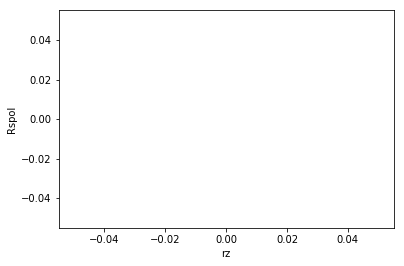

In [32]:
station_1d.plot.scatter(x='rz',y='Rspol')

## Contingency Tables for rainfall gauges vs rainfall radar

In [ ]:
pd.crosstab(station_2min.Rg_mm_10min>=0,station_2min.rz>=0)

In [41]:
pd.crosstab(station_10min.Rg_mm_10>0,station_10min.rz>0)

rz,False,True
Rg_mm_10,,
False,13890077,247092
True,107843,16880


In [40]:
pd.crosstab(station_1h.Rg_mm_10>0,station_1h.rz>0)

rz,False,True
Rg_mm_10,,
False,2209185,114963
True,41158,11711


In [39]:
pd.crosstab(station_1d.Rg_mm_10>0,station_1d.rz>0)

rz,False,True
Rg_mm_10,,
False,69919,14407
True,10086,4720


In [43]:
pd.crosstab(station_1h.Rg_mm_10>0,station_1h.Rspol>0)

Rspol,False,True
Rg_mm_10,,
False,2178134,146014
True,46483,6386


In [42]:
pd.crosstab(station_1h.rz>0,station_1h.Rspol>0)

Rspol,False,True
rz,,
False,2097943,152400
True,126674,0
